## Implementation of Naive Bayes classification for flower species prediction using the Iris dataset and survival prediction using the Titanic dataset

## Iris dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# get the first five features and label sets
# the features are arranged as sepal length, sepal width, petal length and petal width
# the labels are - 0=setosa, 1=versicolor and 2=virginica
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [2]:
# iris # -> this shows all the data and the labels

# if you want to save it as a dataframe
import pandas as pd
df = pd.DataFrame(data=iris.data,
                  columns=iris.feature_names)
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


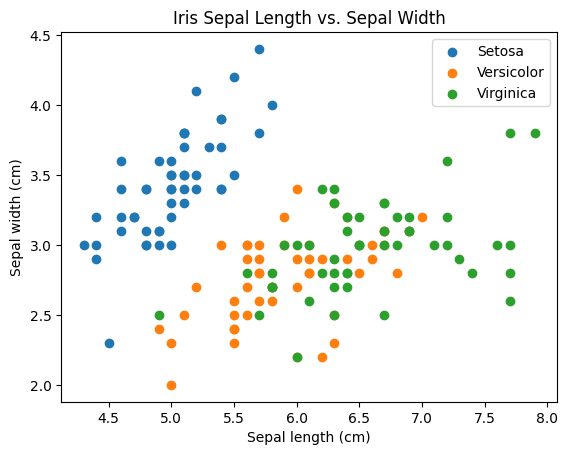

In [3]:
# Separate data by class for visualization
X_setosa = X[y == 0]
X_versicolor = X[y == 1]
X_virginica = X[y == 2]

# Visualize the first two features (sepal length vs. sepal width)
plt.scatter(X_setosa[:, 0], X_setosa[:, 1], label='Setosa')
plt.scatter(X_versicolor[:, 0], X_versicolor[:, 1], label='Versicolor')
plt.scatter(X_virginica[:, 0], X_virginica[:, 1], label='Virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Iris Sepal Length vs. Sepal Width')
plt.legend()
plt.show()

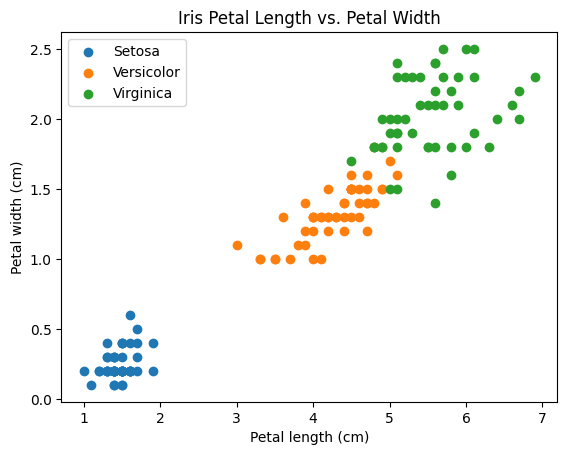

In [4]:
# Print out petal length and petal width for visualization

X_setosa = X[y == 0]
X_versicolor = X[y == 1]
X_virginica = X[y == 2]

# Visualize the first two features (sepal length vs. sepal width)
plt.scatter(X_setosa[:, 2], X_setosa[:, 3], label='Setosa')
plt.scatter(X_versicolor[:, 2], X_versicolor[:, 3], label='Versicolor')
plt.scatter(X_virginica[:, 2], X_virginica[:, 3], label='Virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Iris Petal Length vs. Petal Width')
plt.legend()
plt.show()

## Training and Prediction with Gaussian NB

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance (accuracy in this case)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [6]:
# Evaluate performance using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
 # precision, recall and F1-score are different metrics used in evaluating the accuracy of the classification technique
 # below is the mathematical formulation for these metrics
#  precision = TP / (TP + FP)
#  recall = TP / (TP + FN)
#  1 / F1-score = 1 / precision + 1 / recall

Cross-validation is a technique used to evaluate how well a machine learning model generalizes to new data. Instead of just splitting the data into a training set and a test set once, cross-validation involves splitting the data into multiple sets (or "folds"). The model is trained on some of these folds and tested on the remaining fold, and this process is repeated multiple times, with each fold being used as the test set exactly once. This allows us to get a more reliable estimate of the model's performance because it is tested on different subsets of the data.

For example, in 5-fold cross-validation, the data is divided into 5 equal parts. The model is trained on 4 parts and tested on the remaining part, and this process is repeated 5 times (each time using a different part as the test set). The performance scores from each iteration are then averaged to get an overall performance metric.

In [9]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean CV Accuracy: 0.9533333333333334


# Titanic dataset

In [13]:
import pandas as pd

# load the dataset
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [14]:
# drop all the unncessary columns
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [15]:
# separate the target (label) from the data
inputs = df.drop('Survived',axis='columns')
target = df.Survived

we can either replace the values in the 'Sex' column to 0 and 1 for male and female, respectively. Or, create another column to identify the gender.

In [16]:
# Approach 1 - get dummies
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

# # Approach 2 - get 0s and 1s in the same column
# # with this, you won't need the next two cells of codes
# inputs.Sex = inputs.Sex.map({'male': 0, 'female': 1})
# inputs.head()

,female,male
0,False,True
1,True,False
2,True,False


In [17]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False


Drop the male column because one column is enough to represent male vs female.

In [18]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True


In [19]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [20]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [21]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True
3,1,35.0,53.1000,True
4,3,35.0,8.0500,False


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [23]:
# instantiate the Gaussian NB model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [24]:
# fit the model instance with the data
model.fit(X_train,y_train)

GaussianNB()

In [25]:
# get the model's score to evaluate its accuracy
model.score(X_test,y_test)

0.7686567164179104

In [26]:
X_test[0:10]

,Pclass,Age,Fare,female
812,2,35.000000,10.5000,False
146,3,27.000000,7.7958,False
74,3,32.000000,56.4958,False
819,3,10.000000,27.9000,False
54,1,65.000000,61.9792,False
421,3,21.000000,7.7333,False
535,2,7.000000,26.2500,True
786,3,18.000000,7.4958,True
485,3,29.699118,25.4667,True
489,3,9.000000,15.9000,False


In [27]:
# corresponding y_test values
y_test[0:10]

812    0
146    1
74     1
819    0
54     0
421    0
535    1
786    1
485    0
489    1
Name: Survived, dtype: int64

In [28]:
# corresponding predicted values
model.predict(X_test[0:10])

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [29]:
# although the model predicts 0s or 1s, there is a certain probability associated with each prediction
# check the probability of occurrence of 0 or 1; higher the value, more is the model's confidence
model.predict_proba(X_test[:10])

array([[0.93477199, 0.06522801],
       [0.96219897, 0.03780103],
       [0.93470616, 0.06529384],
       [0.94228969, 0.05771031],
       [0.64257085, 0.35742915],
       [0.95783873, 0.04216127],
       [0.15570285, 0.84429715],
       [0.34107499, 0.65892501],
       [0.38799166, 0.61200834],
       [0.94403477, 0.05596523]])

Calculate the score using cross validation

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.752     , 0.8       , 0.832     , 0.75806452, 0.7983871 ])

In [31]:
print(confusion_matrix(y_test, model.predict(X_test)))

[[131  30]
 [ 32  75]]


In [32]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       161
           1       0.71      0.70      0.71       107

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

